### Decision Tree(의사결정 나무)
- 스무고개 하듯이 True/False 질문을 반복하며 학습
- 특정 기준(질문, node)에 따라 데이터를 구분하는 모델
- 분류나 회귀 모두 사용 가능

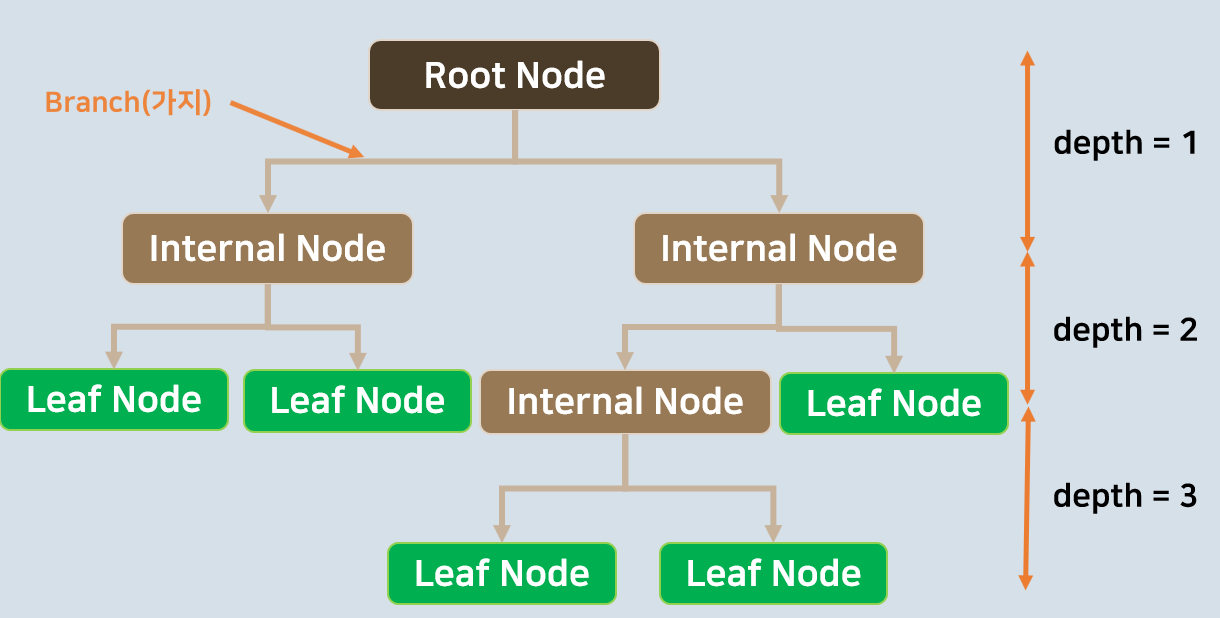

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 분리하는 도구
from sklearn.model_selection import train_test_split

#### 1. 문제정의
- 버섯데이터를 활용해서 독성/식용 버섯을 분류

#### 2. 데이터 수집

In [2]:
data = pd.read_csv("./data/mushroom.csv")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# 데이터 크기 확인
data.shape
# 특성 22ea + 정답 1ea

(8124, 23)

In [4]:
data.info()
# 결측치 없음 -> 별도로 전처리 X
# sklearn 모델들은 문자열 값을 입력으로 허용하지 않는다!
# 데이터 타입 확인 시 object 인경우 int, flot 형태로 변경 해야 모델 학습 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


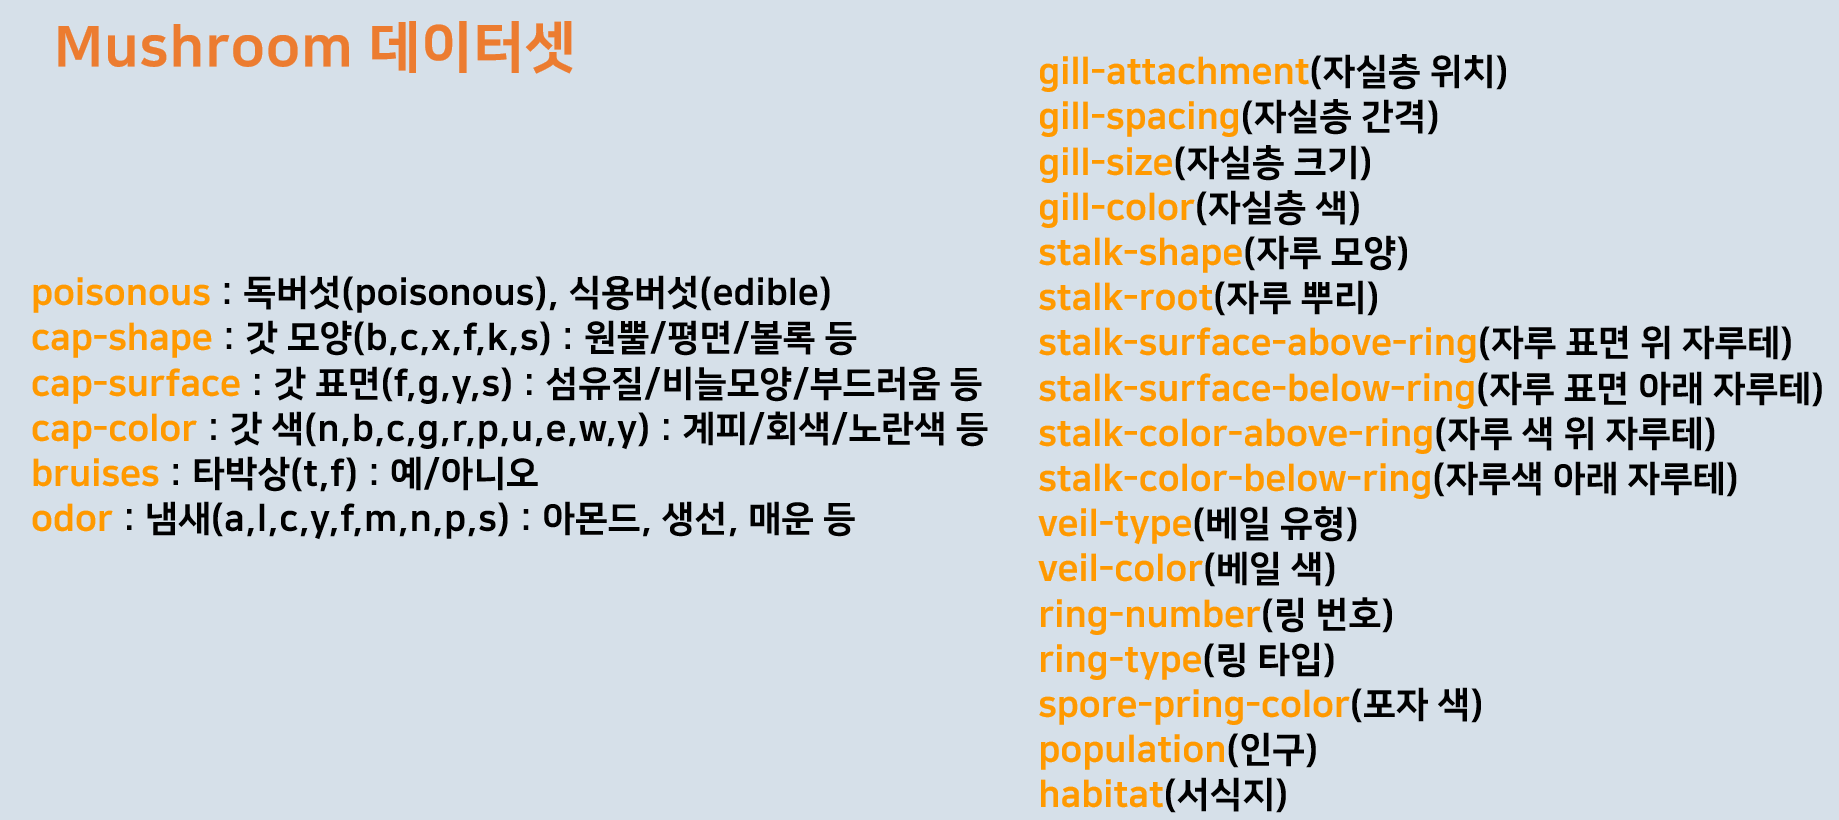

In [6]:
# X, y 데이터 분리해서 변수에 담기
X= data.drop('poisonous', axis=1)
y= data['poisonous']

In [7]:
X.shape, y.shape

((8124, 22), (8124,))

In [8]:
y.value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [9]:
# X의 기술통계량(요약본) 확인
X.describe().T

# count: 데이터 개수
# unique: 고유값 개수
# top: 가장 많은 개수의 문자열
# freq: 가장 많은 개수의 문자열의 개수

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


#### 데이터 전처리
- 결측치 대체, 제거
- 이상치 대체, 제거
- 변수처리
    - 인코딩: 범주형 데이터를 숫자형으로 변환
    - label encoding: 수치값으로 mapping 하는 작업
    - one_hot encoding: 0 or 1의 값을 가진 여러개의 새로운 특성으로 변경하는 작업
- train, test 분리

In [10]:
# label encoding
# 바뀌어진 숫자값들의 높고 낮음의 의미가 필요할 때
X['cap-shape'].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'o':5})

0       0.0
1       0.0
2       3.0
3       0.0
4       0.0
       ... 
8119    2.0
8120    0.0
8121    1.0
8122    2.0
8123    0.0
Name: cap-shape, Length: 8124, dtype: float64

In [11]:
# one_hot encoding
# 바뀌어진 숫자값들의 높고 낮음의 의미가 필요하지 않을 때
# 데이터의 unique개수만큼 컬럼을 추가
# 데이터를 다 1 or 0으로 바꿈

X_one_hot = pd.get_dummies(X)
X_one_hot
# 데이터 값의 각 unique의 개수만큼 컬럼의 수가 늘어남
# 총 컬럼의 수 22ea -> 117ea

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


#### train, test 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, 
                                                   test_size=0.3,
                                                   random_state=2024,
                                                   stratify=y)
# train_test_split 기능
# 1. 데이터 분할
# 2. 랜덤샘플링 (실행시마다 랜덤으로 데이터를 분할)
#  random_state는 하이퍼파라미터 변경하여 실행시마다 데이터가 변경되지 않도록 고정

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# shape 확인이유
# 1. 문제와 정답의 개수가 같은지 확인
# 2. 특성의 개수가 같은지 확인

((5686, 117), (2438, 117), (5686,), (2438,))

#### 모델링

In [14]:
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 분류모델

In [15]:
# 모델 객체생성
tree1 = DecisionTreeClassifier()
# 모델학습
tree1.fit(X_train, y_train)

# score() : 모델 자체적으로 제공하는 성능 평가 지표
tree1.score(X_test, y_test)

1.0

### 모델링 + 하이퍼파라미터
- max_depth: 최대 깊이 지정
- max_leaf_nodes: 최대 리프 노드의 수 지정
- max_samples_split: 노드를 분할하기 위한 최소 샘플 수를 지정
    - 지정한 값보다 적은 샘프을 가지는 노드는 분할 되지 않음
- max_samples_leaf: 리프노드가 가져야 하는 최소 샘플 수를 지정
    - 분할 전에 지정한 값보다 적은 샘플을 가진 노드가 나오는 경우 분할 방지

In [16]:
tree2 = DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train, y_train)
tree2.score(X_test,y_test)
# 하이퍼파라미터를 조절 한 후

0.9868744872846595

### tree모델 내부 시각화

In [17]:
# graphviz
!pip install graphviz

In [18]:
from sklearn.tree import export_graphviz # 내보내기용 도구

export_graphviz(tree1, # 확인할 모델
                out_file='./data/tree1.dot', # 경로, 파일명 확장자
               class_names=['독','식용'], # 정답데이터 이름 설정
               feature_names=X_one_hot.columns, # 컬럼이름 설정
               impurity=True, # 불순도 출력 여부
               filled=True) # 각 노드들의 클래스가 구분되도록 색을 칠해주는 명령

# 학습된 tree1모델의 정보가 들어있는 dot 파일을 생성

In [19]:
import graphviz

with open('./data/tree1.dot', encoding='UTF-8') as f:
    dot_graph = f.read() # 변수 선언해서 파일을 읽어오기

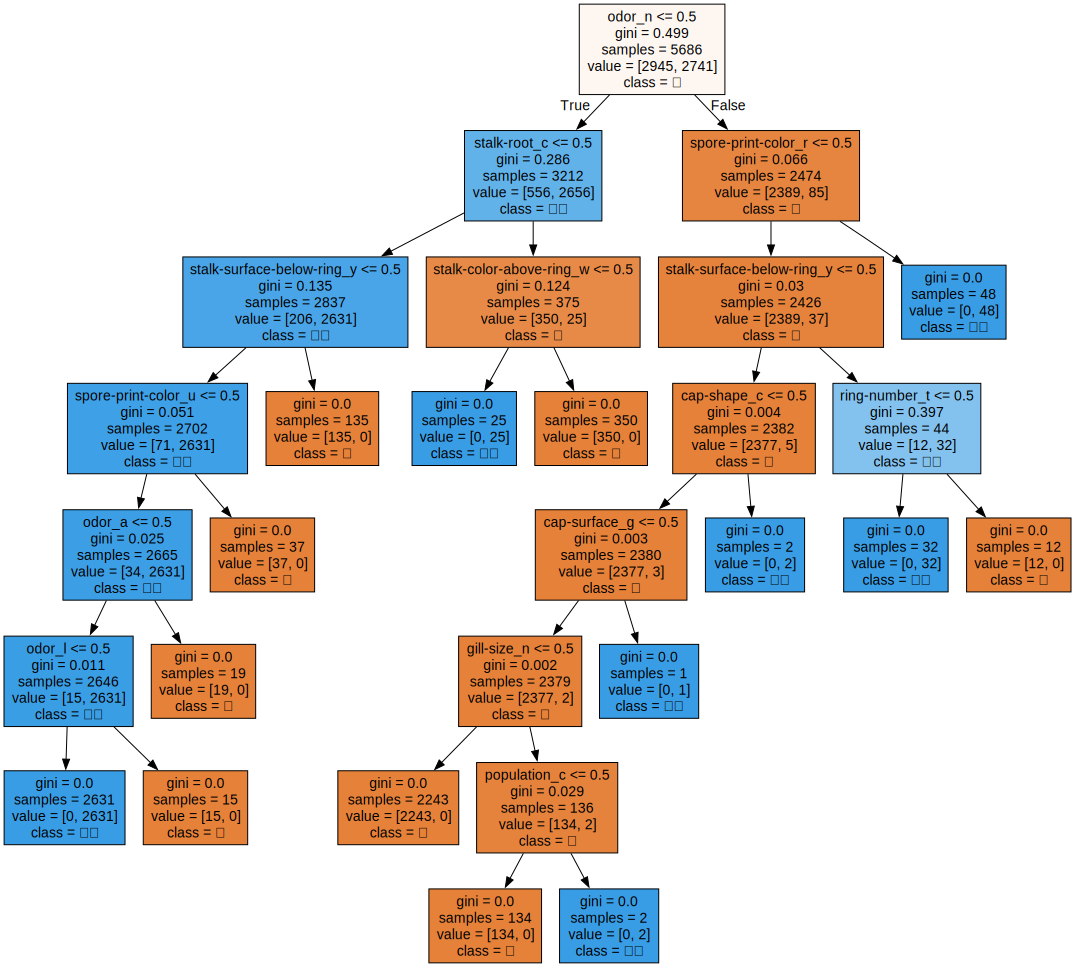

In [20]:
graphviz.Source(dot_graph)

In [21]:
export_graphviz(tree2, # 확인할 모델
                out_file='./data/tree2.dot', # 경로, 파일명 확장자
               class_names=['독','식용'], # 정답데이터 이름 설정
               feature_names=X_one_hot.columns, # 컬럼이름 설정
               impurity=True, # 불순도 출력 여부
               filled=True) # 각 노드들의 클래스가 구분되도록 색을 칠해주는 명령

# 학습된 tree1모델의 정보가 들어있는 dot 파일을 생성

In [22]:
import graphviz

with open('./data/tree2.dot', encoding='UTF-8') as f:
    dot_graph = f.read() # 변수 선언해서 파일을 읽어오기

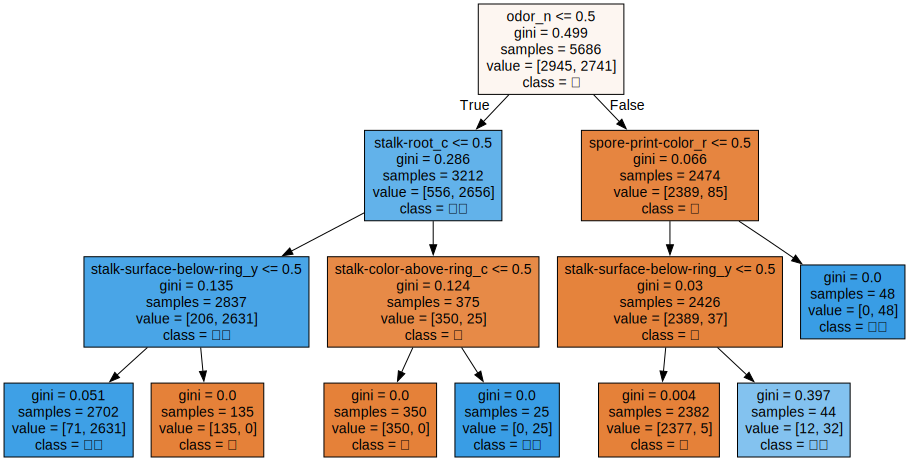

In [23]:
graphviz.Source(dot_graph)

### tree모델 장단점

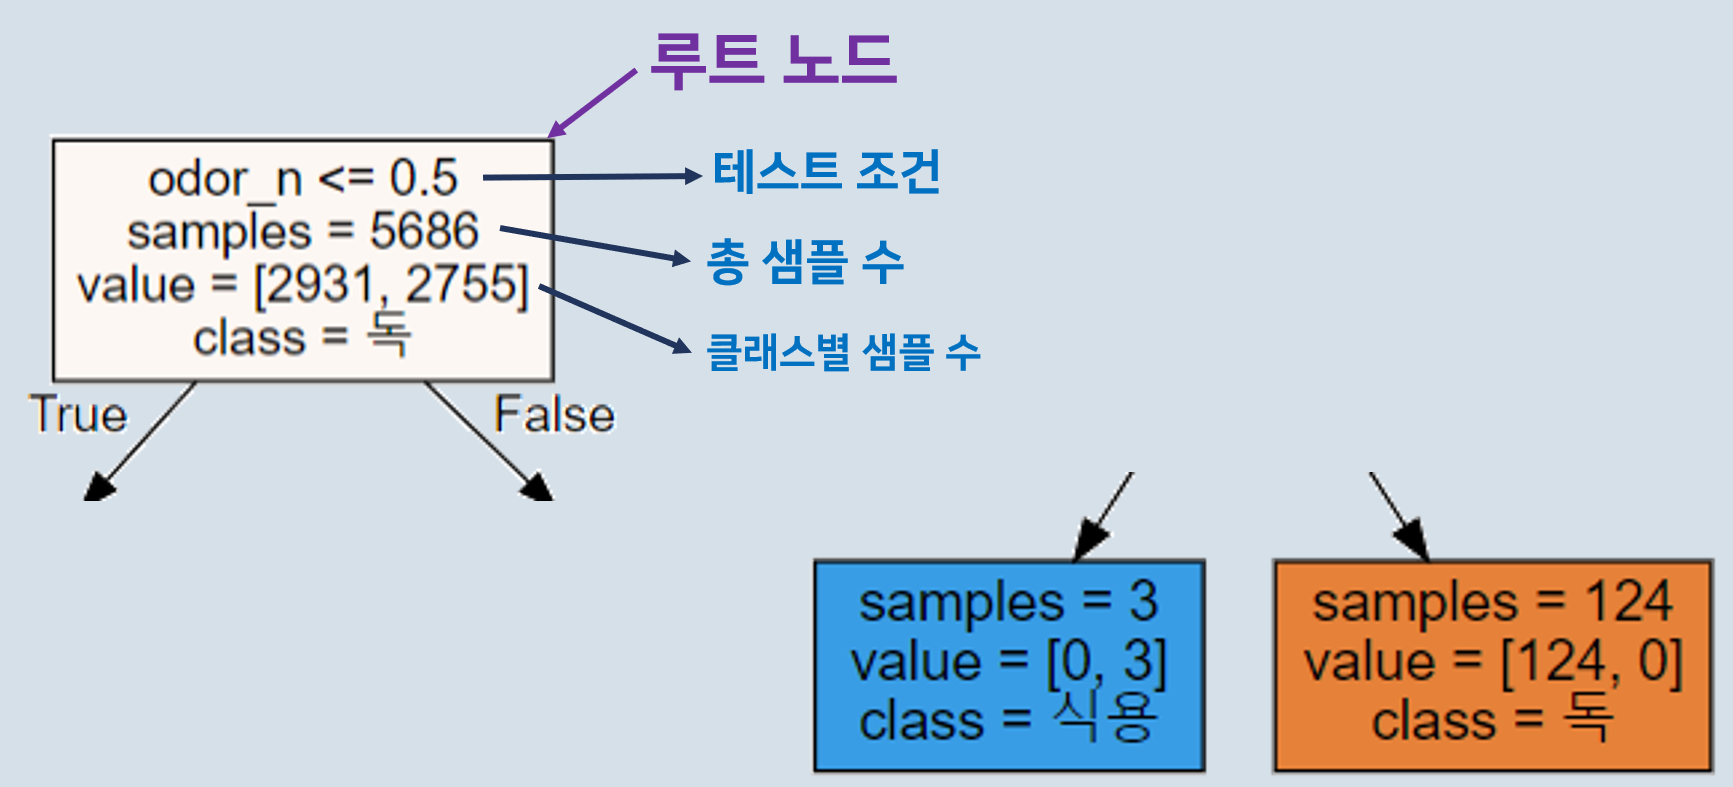

### tree 모델 장단점
- 결과 해석에 용이함
- 수치형, 범주형 데이터 모두 처리가능
- 각 feature별로 스케일링이나 정규화가 별도로 필요하지 않음
- 특성중요도를 제공-> 특성 선택

#### 특성 선택
- 데이터의 특성 중요도를 활용하여 "특성성택" 가능!
- 특성들이 정답에 영향을 미치는 정도를 수치화해서 확인 가능
- 0~1 사이의 값을 가지고, 총합은 1(1에 가까울수록 중요한 특성)
- tree 모델에서는 특성 중요도가 높은 값(불순도가 낮은 컬럼)을 최상단의 질문으로 배치

In [24]:
pd.set_option('display.max_seq_items',None)

In [25]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f',
       'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
    

In [26]:
# tree모델에서 특성 중요도 확인
fi = tree2.feature_importances_

pd.DataFrame(fi).sort_values(0, ascending=False)

,0
27,0.656659
53,0.183556
63,0.108187
100,0.034144
65,0.017454
...,...
35,0.000000
34,0.000000
33,0.000000
32,0.000000


In [27]:
pd.set_option('display.max_rows', None)

In [28]:
# 인덱스명을 컬럼명으로 변경
fi_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])
fi_df.sort_values('특성중요도', ascending=False)

,특성중요도
odor_n,0.656659
stalk-root_c,0.183556
stalk-surface-below-ring_y,0.108187
spore-print-color_r,0.034144
stalk-color-above-ring_c,0.017454
cap-shape_b,0.000000
veil-color_w,0.000000
veil-color_o,0.000000
veil-color_n,0.000000
veil-type_p,0.000000


### 정리
- tree 모델 내부시각화 그래프를 보면 특성 중요도가 높은 ordor_n컬럼을 가장 상위 노드에 배치 시킨 것을 확인!
- 중요도가 높은 컬럼을 먼저 고려하여야 효율성있는 분류를 할 수 있다.
- 현재 버섯데이터는 하나의 특성인 ordor_n이 60% 이상의 지분을 차지함
- 모델의 학습이 용이 -> 정확도가 높게 나온 것임

### 교차검증
- 일반화 성능 확인할 수 있는 검증방법
- 방법: (훈련데이터 안에서) 훈련세트와 테스트세트로 여러겹 나누어 평가
- 모델의 최종평가 전에 평균적인 정확도 확인 가능
- 각 결과가 비슷한 정확도를 보인다면 일반화 가능성이 높은 모델이다
- 한번의 학습과 평가를 진행하는 것보다 여러번 나누어 진행하기 때문에 일반화 확인 가능

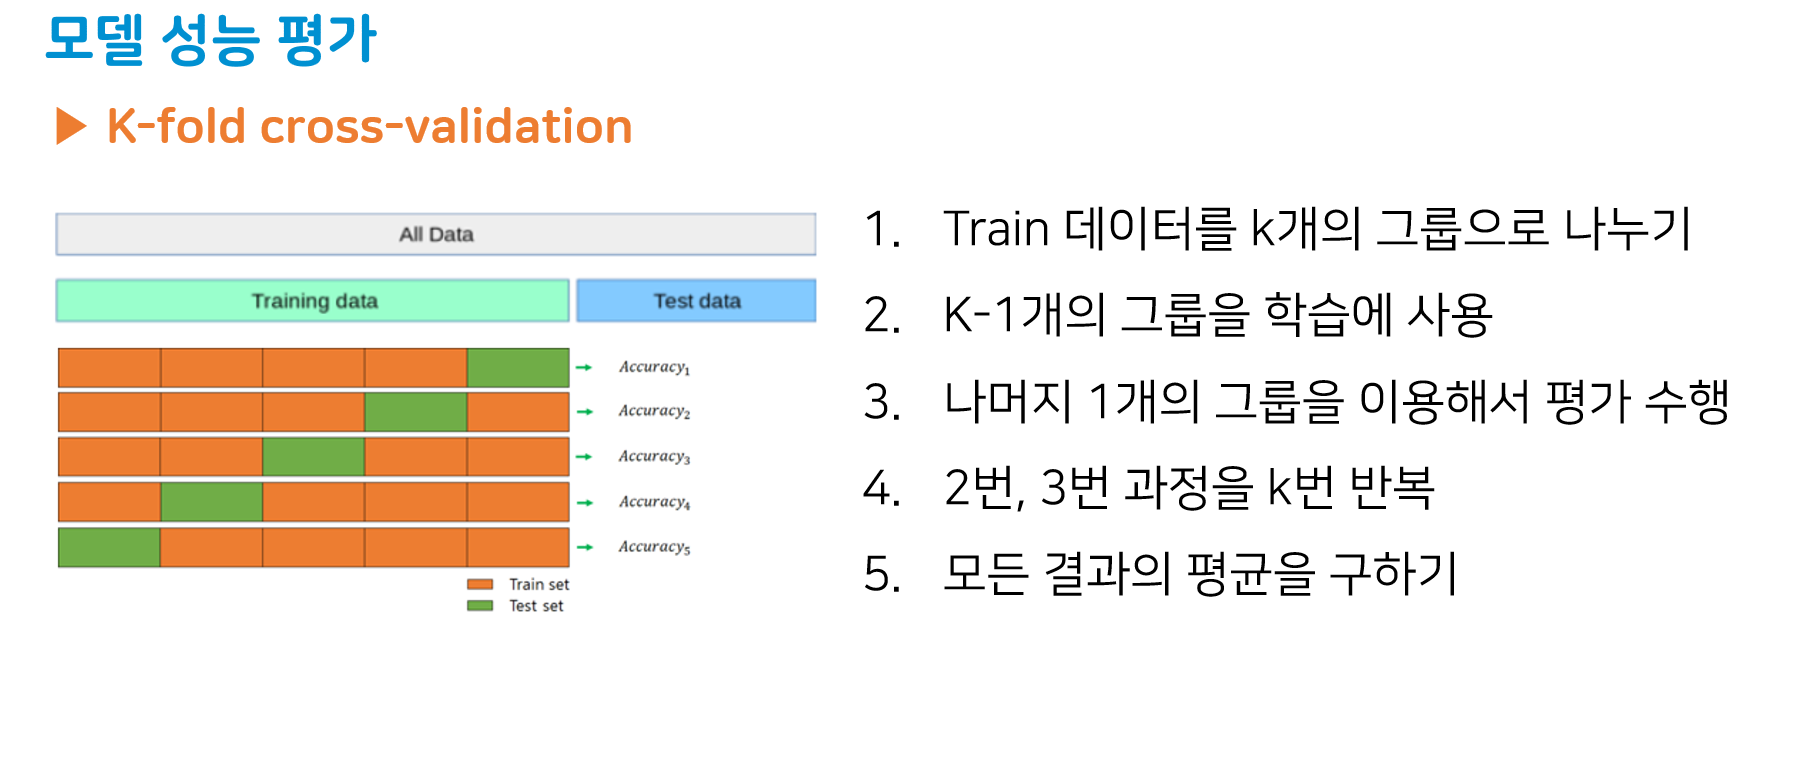

In [31]:
from sklearn.model_selection import cross_val_score # 교차검증도구
# (적용할 모델명, 훈련용문제, 훈련용 정답, cv = 교차검증횟수)
result=cross_val_score(tree1, X_train, y_train, cv=5)
result.mean()

0.9998240985048372

In [35]:
# tree2 교차검증
cross_val_score(tree2, X_train, y_train, cv=5)
# tree 모델은 어떤 데이터세트가 들어와도 동일한 성능을 내는 것을 확인
# 모드 1에 가까운 정확도를 내고있다! -> 일반화 가능성이 높다!
# 과적합일 확률이 낮겠다~ -> 특성중요도, 그래프시각화

array([0.98594025, 0.98680739, 0.98504837, 0.98240985, 0.98240985])